In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import log_loss
from sklearn.grid_search import GridSearchCV

%matplotlib inline


C:\Users\shooh_000\Anaconda3\envs\python2\lib\site-packages\pandas\computation\__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [14]:
#Playground
all_train = pd.read_csv('data/train.csv')
all_train = all_train.reindex(np.random.permutation(all_train.index))
all_train['Breed'] = all_train['Breed'].str.replace('Black/Tan', 'BlackTan')
all_train['Breed'] = all_train['Breed'].str.replace('/Unknown', ' Unknown')
all_train['Breed'] = all_train['Breed'].str.replace('St. Bernard Rough Coat', 'StBernard')
all_train['Breed'] = all_train['Breed'].str.replace('St. Bernard Smooth Coat', 'StBernard')
##all_train['Breed'] = all_train['Breed'].str.replace('German Shorthair Pointer', 'Pointer')
##all_train['Breed'] = all_train['Breed'].str.replace('German Wirehaired Pointer', 'Pointer')
all_train['Breed'] = all_train['Breed'].str.replace('Dachshund Longhair', 'Dachshund')
all_train['Breed'] = all_train['Breed'].str.replace('Dachshund Wirehair', 'Dachshund')
#all_train['Breed'] = all_train['Breed'].str.replace('English Pointer', 'Pointer')

all_train['Breed'] = all_train['Breed'].str.replace(' ', '')
#all_train['Breed'] = all_train['Breed'].str.replace('PitBull', ' PitBull ')
#all_train['Breed'] = all_train['Breed'].str.replace('Rottweiler', ' Rottweiler ')
all_train['Breed'] = all_train['Breed'].str.replace('/', ' known ')
#all_train['Breed'] = all_train['Breed'].str.replace('Mix', ' Mix ')
all_train['Breed'] = all_train['Breed'].str.replace('Mix', '')
all_train['Breed'] = all_train['Breed'].str.replace('Unknown', '')
all_train['Breed'] = all_train['Breed'].str.replace('Australian', '')
all_train['Breed'] = all_train['Breed'].str.replace('American', '')
all_train['Breed'] = all_train['Breed'].str.replace('YorkshireTerrier', ' Yorkshire ')

split = all_train.shape[0] // 20
dev = all_train[:split]
train = all_train[split:]

In [88]:
##Current best feature engineering
all_train = pd.read_csv('data/train.csv')
all_train = all_train.reindex(np.random.permutation(all_train.index))
all_train['Breed'] = all_train['Breed'].str.replace('Black/Tan', 'BlackTan')
all_train['Breed'] = all_train['Breed'].str.replace('/Unknown', ' Unknown')
all_train['Breed'] = all_train['Breed'].str.replace('St. Bernard Rough Coat', 'StBernard')
all_train['Breed'] = all_train['Breed'].str.replace('St. Bernard Smooth Coat', 'StBernard')
all_train['Breed'] = all_train['Breed'].str.replace('Dachshund Longhair', 'Dachshund')
all_train['Breed'] = all_train['Breed'].str.replace('Dachshund Wirehair', 'Dachshund')
all_train['Breed'] = all_train['Breed'].str.replace(' ', '')
all_train['Breed'] = all_train['Breed'].str.replace('/', ' known ')
all_train['Breed'] = all_train['Breed'].str.replace('Mix', '')
all_train['Breed'] = all_train['Breed'].str.replace('Unknown', '')
all_train['Breed'] = all_train['Breed'].str.replace('Australian', '')
all_train['Breed'] = all_train['Breed'].str.replace('American', '')
all_train['Breed'] = all_train['Breed'].str.replace('YorkshireTerrier', ' Yorkshire ')

split = all_train.shape[0] // 20
dev = all_train[:split]
train = all_train[split:]

In [86]:
cv = CountVectorizer()
train_corpus = cv.fit_transform(train.Breed)
dev_corpus = cv.transform(dev.Breed)
features = np.array(cv.get_feature_names())

Cs = {'C': [.03, .05, .1, .3, .5, 1]}
#Cs = {'C': [.01, .03, .05, .1, .3, .5, 1, 10, 30, 50, 70, 100, 300, 700, 1000, 2000, 5000, 10000]}
logreg = LogisticRegression(penalty='l1')
##Use GridSearchCV to determine best C
clf = GridSearchCV(logreg, Cs)
clf.fit(train_corpus, train.OutcomeType)
best_c = clf.best_params_['C']
print best_c

0.5


Logistc Regression Log Loss: 1.140
Logistc Regression Accuracy: 0.493 

italiangreyhound 0.552
bluetickhound   0.554
mainecoon       0.714
redbonehound    0.780
vizsla          0.920
chihuahuashorthair             0.332
siamese                        0.845
domesticmediumhair             0.978
domesticshorthair              1.119
domesticlonghair               1.561
rottweiler                                    0.975
domesticlonghair                              0.976
stbernard                                     1.273
pitbull                                       1.341
chowchow                                      1.388
alaskanmalamute                                              0.676
canecorso                                                    0.686
bostonterrier                                                0.737
bassethound                                                  0.740
bloodhound                                                   1.324
pekingese                            

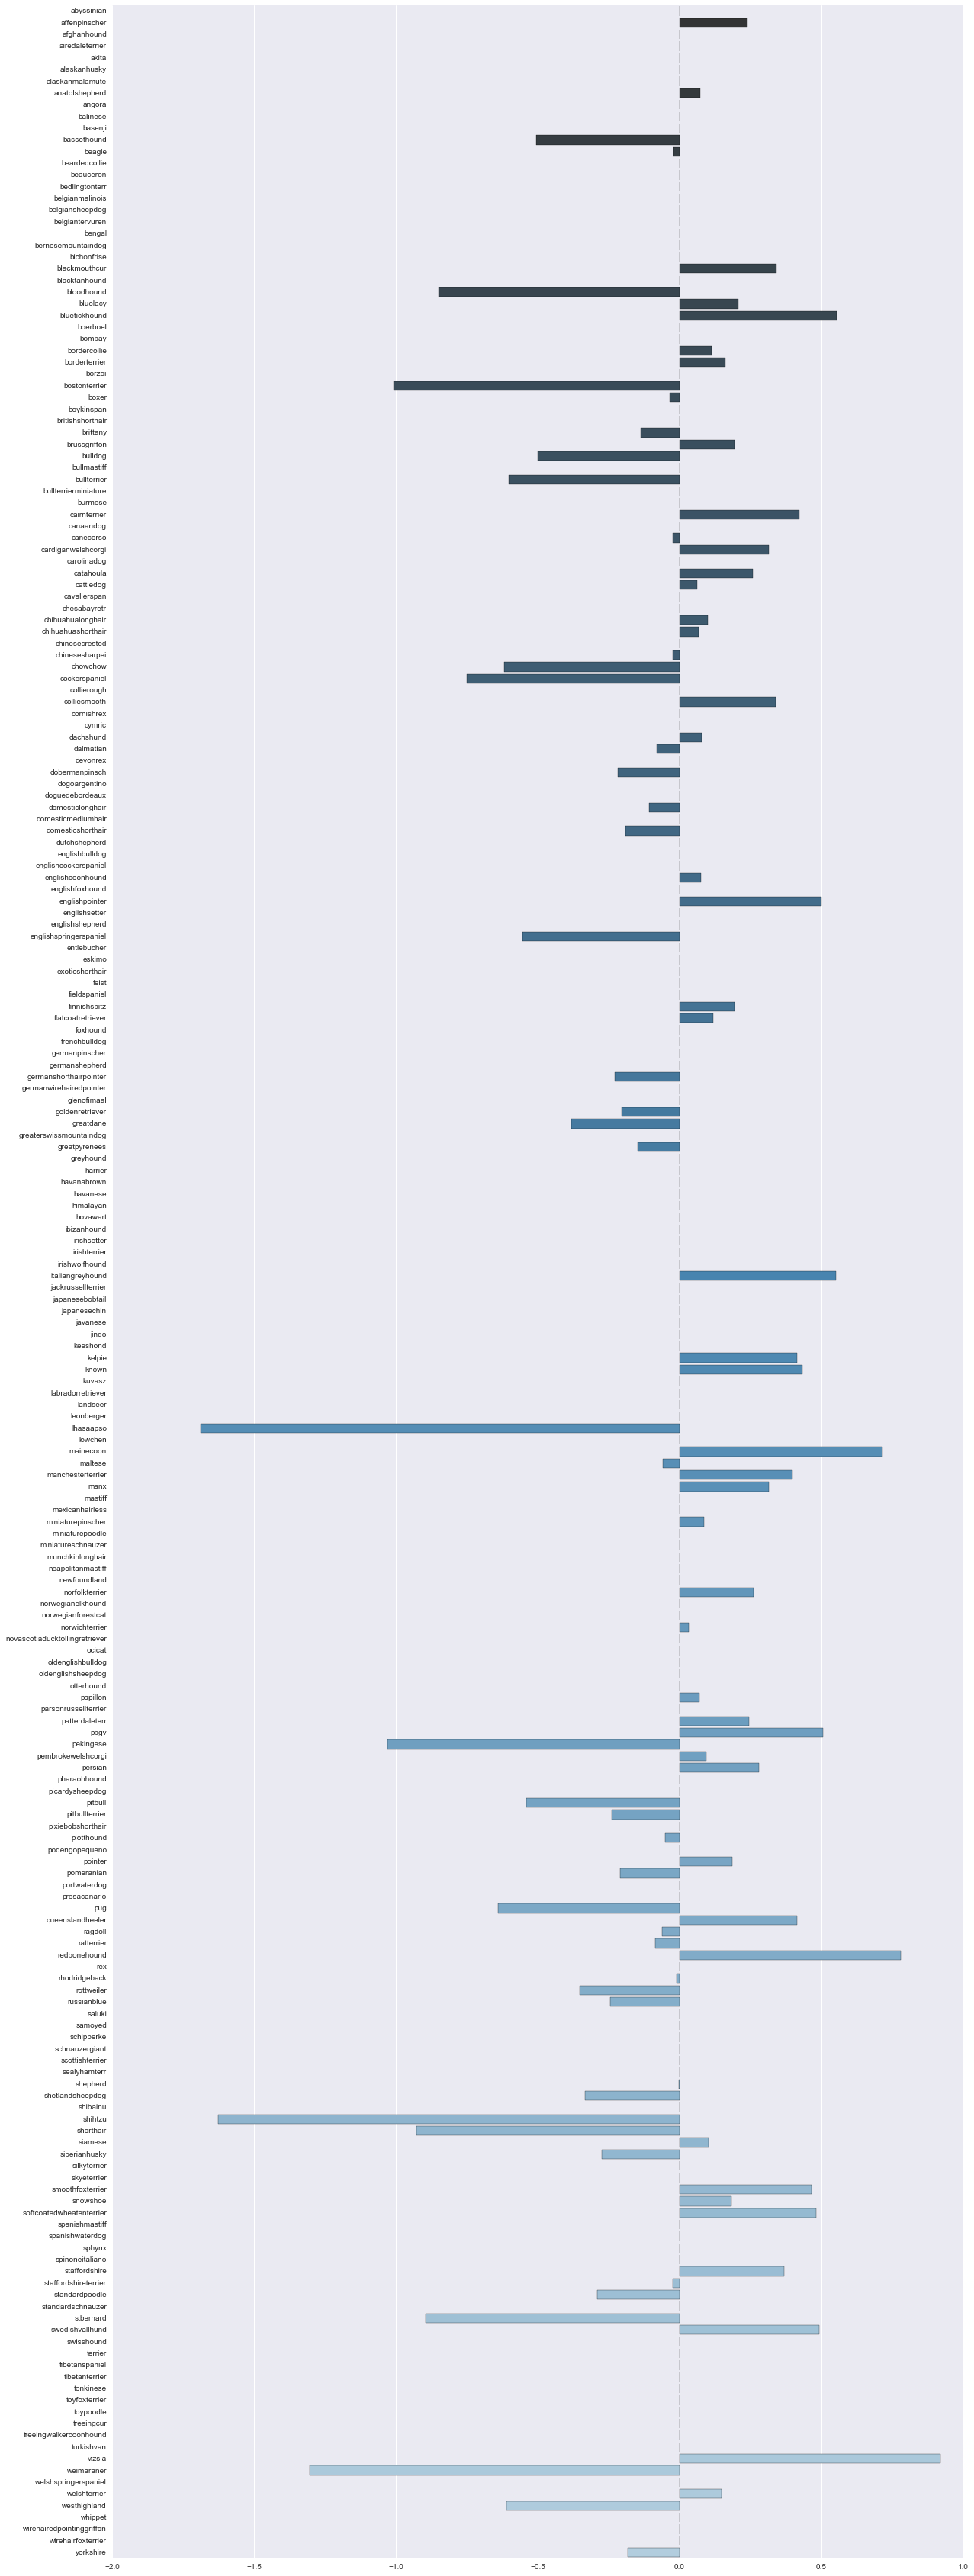

In [89]:
cv = CountVectorizer()
train_corpus = cv.fit_transform(train.Breed)
dev_corpus = cv.transform(dev.Breed)
features = np.array(cv.get_feature_names())

clf = LogisticRegression(penalty='l1', C=0.5)
clf.fit(train_corpus, train.OutcomeType)
preds = clf.predict_proba(dev_corpus)
print 'Logistc Regression Log Loss: {:.3f}'.format(log_loss(dev.OutcomeType, preds))
print 'Logistc Regression Accuracy: {:.3f}'.format(clf.score(dev_corpus, dev.OutcomeType)), '\n'


for a in range(5):
        space = 15 * (a+1)
        for b in range(5):
            print '{:<{width}} {:.3f}'.format(features[[np.argsort(clf.coef_[a])[-5:]]][b], 
                                    clf.coef_[a][np.argsort(clf.coef_[a])[-5:]][b], width=space)

plt.figure(figsize=(20,60))
sns.barplot(x=clf.coef_[0], y=cv.get_feature_names(), palette='Blues_d', orient = 'h')

clf = BernoulliNB()
clf.fit(train_corpus, train.OutcomeType)
preds = clf.predict_proba(dev_corpus)
print 'Naive Bayes Log Loss: {:.3f}'.format(log_loss(dev.OutcomeType, preds))
print 'Naive Bayes Accuracy: {:.3f}'.format(clf.score(dev_corpus, dev.OutcomeType))

plt.show()

